<a href="https://colab.research.google.com/github/VictoriaOG1/ProyectoFinal_IA/blob/main/Proyecto6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
import tensorflow as tf
import tensorflow_datasets as tf_ds
from sklearn.model_selection import KFold
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [241]:
#Download the dataset MNIST (numbers) 
datos, metadatos = tf_ds.load('mnist', as_supervised=True, with_info=True)

In [242]:
#Download the dataset MNIST_CORRUPTED (corrupted numbers with glass blur)
data_corrupted, metadatos_corrupted = tf_ds.load('mnist_corrupted/glass_blur', as_supervised=True, with_info=True)

In [363]:
#Obtain separate values for tranning and testing
train_data, test_data = datos['train'], datos['test']

In [244]:
#Obtain separate value for trainning and testing (corrupted data)
train_data_corrupted, test_data_corrupted = data_corrupted['train'], data_corrupted['test']

In [245]:
#Tag the digits as labels 
names_number = metadatos.features['label'].names

In [249]:
#Normalize function
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 #Pass RGB to grayscale
  return images, labels

#Normalize the train and test data with function
train_data = train_data.map(normalize)
test_data = test_data.map(normalize)
train_data_corrupted = train_data_corrupted.map(normalize)
test_data_corrupted = test_data_corrupted.map(normalize)

#Training data to array
X = np.array(list(map(lambda x: x[0], train_data)))
Y = np.array(list(map(lambda x: x[1], train_data)))
X_corrupted = np.array(list(map(lambda x: x[0], train_data_corrupted)))
Y_corrupted = np.array(list(map(lambda x: x[1], train_data_corrupted)))

#Test data to array
test_images = np.array(list(map(lambda x: x[0], train_data)))
test_labels = np.array(list(map(lambda x: x[1], train_data)))
test_images_corrupted = np.array(list(map(lambda x: x[0], train_data_corrupted)))
test_labels_Y_corrupted = np.array(list(map(lambda x: x[1], train_data_corrupted)))

In [252]:
#Create model with a function
def create_first_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), 
    tf.keras.layers.Dense(1024, input_shape=(784,), activation=None),
    tf.keras.layers.Dense(1024, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(2048, input_shape=(1024,),activation=None), 
    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, input_shape=(2048, ),activation=None) 
  ])
  model.compile(
      optimizer=tf.keras.optimizers.SGD(0.01),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy']
  )
  return model

def create_second_model():
  #Create Model
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - white and black 
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #For classification 
  ])

  #Compile Model
  model.compile(
      optimizer='adam', #Adam's algorithm
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy']
  )
  return model

In [251]:
#K fold cross validation model 1
k=5
training_loss = [0,0,0,0,0] 
training_accuracy = [0,0,0,0,0] 
validation_loss = [0,0,0,0,0] 
validation_accuracy = [0,0,0,0,0]
weights = []
model_example = create_first_model()

for train_index, validation_index in KFold(k).split(X):
  #Partition
  x_train,x_validation=X[train_index],X[validation_index]
  y_train,y_validation=Y[train_index],Y[validation_index]

  #Create model
  modelo=create_first_model()
  
  #Training and validation (loss and accuracy values saved)
  training = modelo.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_validation, y_validation))

  training_loss = np.array(training_loss) + np.array(training.history["loss"])
  training_accuracy = np.array(training_accuracy) + np.array(training.history["accuracy"])
  validation_loss = np.array(validation_loss) + np.array(training.history["val_loss"])
  validation_accuracy = np.array(validation_accuracy) + np.array(training.history["val_accuracy"])
  
  weights = modelo.weights

  model_example = modelo


training_loss = training_loss/5
training_accuracy = training_accuracy/5
validation_loss = validation_loss/5
validation_accuracy = validation_accuracy/5

Epoch 1/5
1500/1500 [==============================] - 39s 26ms/step - loss: 14.5426 - accuracy: 0.0975 - val_loss: 14.5587 - val_accuracy: 0.0967
Epoch 2/5
1500/1500 [==============================] - 38s 25ms/step - loss: 14.5463 - accuracy: 0.0975 - val_loss: 14.5587 - val_accuracy: 0.0967
Epoch 3/5
1500/1500 [==============================] - 38s 26ms/step - loss: 14.5463 - accuracy: 0.0975 - val_loss: 14.5587 - val_accuracy: 0.0967
Epoch 4/5
1500/1500 [==============================] - 36s 24ms/step - loss: 14.5463 - accuracy: 0.0975 - val_loss: 14.5587 - val_accuracy: 0.0967
Epoch 5/5
1500/1500 [==============================] - 37s 24ms/step - loss: 14.5463 - accuracy: 0.0975 - val_loss: 14.5587 - val_accuracy: 0.0967
Epoch 1/5
1500/1500 [==============================] - 35s 23ms/step - loss: 13.3078 - accuracy: 0.1116 - val_loss: 13.3472 - val_accuracy: 0.1152
Epoch 2/5
1500/1500 [==============================] - 36s 24ms/step - loss: 13.3096 - accuracy: 0.1117 - val_loss: 13

In [89]:
#K fold cross validation model 2
training_loss1 = [0,0,0,0,0] 
training_accuracy1 = [0,0,0,0,0] 
validation_loss1 = [0,0,0,0,0] 
validation_accuracy1 = [0,0,0,0,0]
weights1 = []
model_example1 = create_second_model()

for train_index, validation_index in KFold(k).split(X):
  #Partition
  x_train,x_validation=X[train_index],X[validation_index]
  y_train,y_validation=Y[train_index],Y[validation_index]

  #Create model
  modelo=create_second_model()
  
  #Training and validation (loss and accuracy values saved)
  training = modelo.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_validation, y_validation))

  training_loss1 = np.array(training_loss1) + np.array(training.history["loss"])
  training_accuracy1 = np.array(training_accuracy1) + np.array(training.history["accuracy"])
  validation_loss1 = np.array(validation_loss1) + np.array(training.history["val_loss"])
  validation_accuracy1 = np.array(validation_accuracy1) + np.array(training.history["val_accuracy"])
  
  weights1 = modelo.weights
  model_example1 = modelo


training_loss1 = training_loss1/5
training_accuracy1 = training_accuracy1/5
validation_loss1 = validation_loss1/5
validation_accuracy1 = validation_accuracy1/5

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3300 - accuracy: 0.9037 - val_loss: 0.1868 - val_accuracy: 0.9446
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1465 - accuracy: 0.9573 - val_loss: 0.1414 - val_accuracy: 0.9589
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9682 - val_loss: 0.1356 - val_accuracy: 0.9611
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0855 - accuracy: 0.9735 - val_loss: 0.1094 - val_accuracy: 0.9705
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0690 - accuracy: 0.9783 - val_loss: 0.1063 - val_accuracy: 0.9698
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3288 - accuracy: 0.9055 - val_loss: 0.1816 - val_accuracy: 0.9477
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1558 - accuracy: 0.9544 - val_loss: 0.1310 - val_accuracy: 0.9587

In [90]:
#K fold cross validation model 1 with corrupted data
training_loss_corrupted = [0,0,0,0,0] 
training_accuracy_corrupted = [0,0,0,0,0] 
validation_loss_corrupted = [0,0,0,0,0] 
validation_accuracy_corrupted = [0,0,0,0,0]
weights_corrupted = []
model_example_corrupted = create_first_model()

for train_index, validation_index in KFold(k).split(X):
  #Partition
  x_train,x_validation=X[train_index],X[validation_index]
  y_train,y_validation=Y[train_index],Y[validation_index]

  #Create model
  modelo=create_first_model()
  
  #Training and validation (loss and accuracy values saved)
  training = modelo.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_validation, y_validation))

  training_loss_corrupted = np.array(training_loss_corrupted) + np.array(training.history["loss"])
  training_accuracy_corrupted = np.array(training_accuracy_corrupted) + np.array(training.history["accuracy"])
  validation_loss_corrupted = np.array(validation_loss_corrupted) + np.array(training.history["val_loss"])
  validation_accuracy_corrupted = np.array(validation_accuracy_corrupted) + np.array(training.history["val_accuracy"])
  
  weights_corrupted = modelo.weights

  model_example_corrupted = modelo


training_loss_corrupted = training_loss_corrupted/5
training_accuracy_corrupted = training_accuracy_corrupted/5
validation_loss_corrupted = validation_loss_corrupted/5
validation_accuracy_corrupted = validation_accuracy_corrupted/5

Epoch 1/5
1500/1500 [==============================] - 32s 21ms/step - loss: 12.5312 - accuracy: 0.0976 - val_loss: 12.5908 - val_accuracy: 0.0967
Epoch 2/5
1500/1500 [==============================] - 33s 22ms/step - loss: 12.5324 - accuracy: 0.0975 - val_loss: 12.5908 - val_accuracy: 0.0967
Epoch 3/5
1500/1500 [==============================] - 33s 22ms/step - loss: 12.5324 - accuracy: 0.0975 - val_loss: 12.5908 - val_accuracy: 0.0967
Epoch 4/5
1500/1500 [==============================] - 34s 23ms/step - loss: 12.5324 - accuracy: 0.0975 - val_loss: 12.5908 - val_accuracy: 0.0967
Epoch 5/5
1500/1500 [==============================] - 37s 24ms/step - loss: 12.5324 - accuracy: 0.0975 - val_loss: 12.5908 - val_accuracy: 0.0967
Epoch 1/5
1500/1500 [==============================] - 38s 25ms/step - loss: 2.3150 - accuracy: 0.1118 - val_loss: 2.3026 - val_accuracy: 0.1152
Epoch 2/5
1500/1500 [==============================] - 37s 25ms/step - loss: 2.3026 - accuracy: 0.1117 - val_loss: 2.302

In [91]:
#K fold cross validation model 2 with corrupted data
training_loss_corrupted1 = [0,0,0,0,0] 
training_accuracy_corrupted1 = [0,0,0,0,0] 
validation_loss_corrupted1 = [0,0,0,0,0] 
validation_accuracy_corrupted1 = [0,0,0,0,0]
weights_corrupted1 = []
model_example_corrupted1 = create_first_model()

for train_index, validation_index in KFold(k).split(X):
  #Partition
  x_train,x_validation=X[train_index],X[validation_index]
  y_train,y_validation=Y[train_index],Y[validation_index]

  #Create model
  modelo=create_second_model()
  
  #Training and validation (loss and accuracy values saved)
  training = modelo.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_validation, y_validation))

  training_loss_corrupted1 = np.array(training_loss_corrupted1) + np.array(training.history["loss"])
  training_accuracy_corrupted1 = np.array(training_accuracy_corrupted1) + np.array(training.history["accuracy"])
  validation_loss_corrupted1 = np.array(validation_loss_corrupted1) + np.array(training.history["val_loss"])
  validation_accuracy_corrupted1 = np.array(validation_accuracy_corrupted1) + np.array(training.history["val_accuracy"])
  
  weights_corrupted1 = modelo.weights

  model_example_corrupted1 = modelo


training_loss_corrupted1 = training_loss_corrupted1/5
training_accuracy_corrupted1 = training_accuracy_corrupted1/5
validation_loss_corrupted1 = validation_loss_corrupted1/5
validation_accuracy_corrupted1 = validation_accuracy_corrupted1/5

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3351 - accuracy: 0.9035 - val_loss: 0.1969 - val_accuracy: 0.9434
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1627 - accuracy: 0.9532 - val_loss: 0.1478 - val_accuracy: 0.9577
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1182 - accuracy: 0.9643 - val_loss: 0.1275 - val_accuracy: 0.9619
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0926 - accuracy: 0.9714 - val_loss: 0.1154 - val_accuracy: 0.9669
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0749 - accuracy: 0.9768 - val_loss: 0.1047 - val_accuracy: 0.9708
Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3378 - accuracy: 0.9025 - val_loss: 0.1926 - val_accuracy: 0.9433
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1569 - accuracy: 0.9541 - val_loss: 0.1302 - val_accuracy: 0.9607

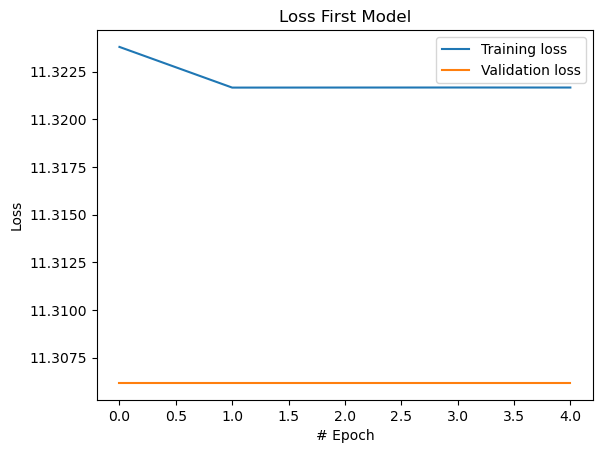

In [92]:
#See the loss function of tranning and validation of first model 
plt.title("Loss First Model")
plt.xlabel('# Epoch')
plt.ylabel("Loss")
plt.plot(training_loss, label='Training loss')
plt.plot(validation_loss, label= 'Validation loss')
plt.legend()

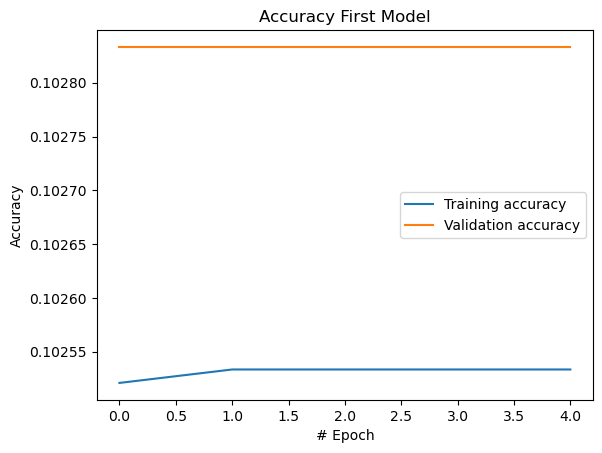

In [93]:
#See the accuracy function of tranning and validation of first model 
plt.title("Accuracy First Model")
plt.xlabel('# Epoch')
plt.ylabel("Accuracy")
plt.plot(training_accuracy, label='Training accuracy')
plt.plot(validation_accuracy, label='Validation accuracy')
plt.legend()

In [94]:
#Weights first model
weights

[<tf.Variable 'dense_255/kernel:0' shape=(784, 1024) dtype=float32, numpy=
 array([[ 5.7138525e-02, -1.6704354e-02,  2.1345444e-02, ...,
          5.6549571e-02,  2.1326259e-02, -5.2498356e-03],
        [ 4.1009292e-02,  2.9941238e-02, -2.6733439e-02, ...,
         -5.6404509e-03,  1.2871213e-02,  4.5897074e-02],
        [-8.5070729e-05, -5.2488163e-02,  4.9279220e-02, ...,
         -3.7361629e-02,  4.8831239e-02,  3.5093069e-02],
        ...,
        [-2.1278422e-02,  1.7556697e-02, -2.0286292e-03, ...,
          4.5486011e-02, -3.9738636e-02,  1.6179703e-02],
        [-2.4952073e-02, -2.8751493e-03,  3.5502762e-02, ...,
         -1.2805317e-02,  3.6897451e-02, -1.4290579e-02],
        [-1.6367376e-02, -1.3748623e-02,  1.9507580e-02, ...,
          1.6040564e-02, -5.1344056e-02, -4.1935995e-02]], dtype=float32)>,
 <tf.Variable 'dense_255/bias:0' shape=(1024,) dtype=float32, numpy=
 array([ 1.5719066e-04, -6.0023656e-05, -4.1754662e-05, ...,
        -2.8090511e-05,  4.4986526e-05,  1.6

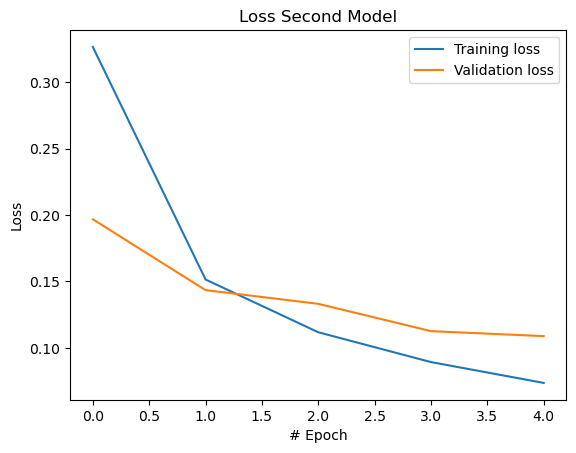

In [95]:
#See the loss function of tranning and validation of second model 
plt.title("Loss Second Model")
plt.xlabel('# Epoch')
plt.ylabel("Loss")
plt.plot(training_loss1, label='Training loss')
plt.plot(validation_loss1, label= 'Validation loss')
plt.legend()

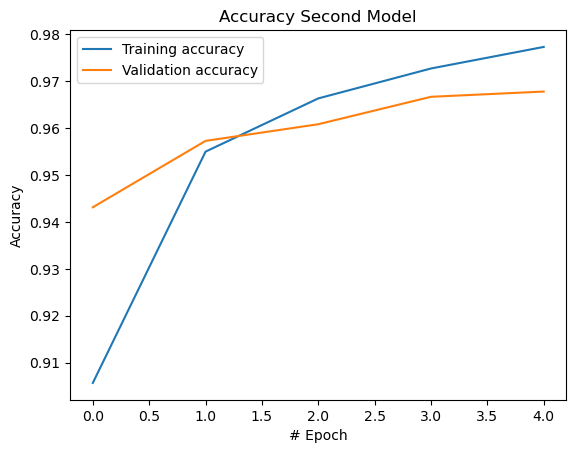

In [96]:
#See the accuracy function of tranning and validation of second model 
plt.title("Accuracy Second Model")
plt.xlabel('# Epoch')
plt.ylabel("Accuracy")
plt.plot(training_accuracy1, label='Training accuracy')
plt.plot(validation_accuracy1, label='Validation accuracy')
plt.legend()

In [97]:
#Weights second model 
weights1

[<tf.Variable 'dense_277/kernel:0' shape=(784, 50) dtype=float32, numpy=
 array([[ 0.06255253,  0.00793143, -0.07913446, ...,  0.01744948,
         -0.01360276, -0.04814264],
        [-0.00418153,  0.03781144,  0.01730552, ...,  0.05426056,
         -0.03013835, -0.01366462],
        [ 0.0834999 , -0.00804287,  0.03099358, ...,  0.01829949,
          0.03461525,  0.05850572],
        ...,
        [ 0.03117855,  0.05171002,  0.01975749, ..., -0.05023922,
          0.0231288 , -0.06163096],
        [-0.05733827,  0.05392645,  0.05390768, ..., -0.01953913,
         -0.05592323,  0.05313405],
        [-0.03233582, -0.00937703, -0.01333926, ..., -0.01959484,
          0.03173028,  0.02442843]], dtype=float32)>,
 <tf.Variable 'dense_277/bias:0' shape=(50,) dtype=float32, numpy=
 array([-2.18649507e-02,  3.39743085e-02, -2.52195131e-02, -9.63437632e-02,
        -8.30921456e-02, -1.25767617e-02,  6.61965162e-02, -5.31273475e-03,
        -1.21456396e-03,  5.40056080e-02, -1.71581149e-01,  3.212

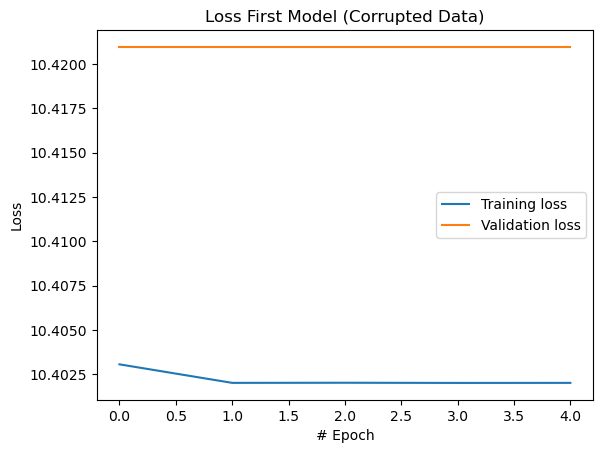

In [98]:
#See the loss function of tranning and validation of first model with corrupted data
plt.title("Loss First Model (Corrupted Data)")
plt.xlabel('# Epoch')
plt.ylabel("Loss")
plt.plot(training_loss_corrupted, label='Training loss')
plt.plot(validation_loss_corrupted, label= 'Validation loss')
plt.legend()

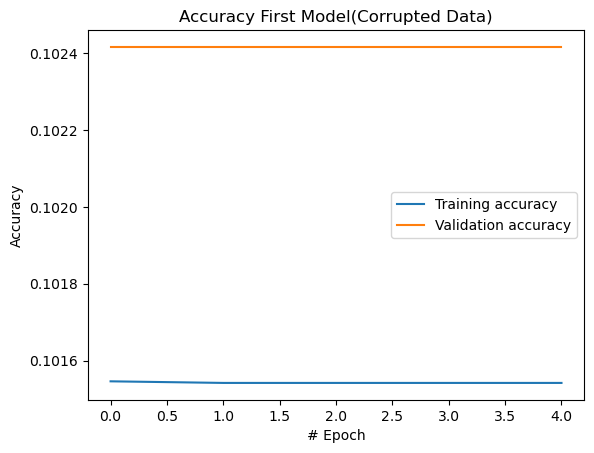

In [99]:
#See the accuracy function of tranning and validation of second model 
plt.title("Accuracy First Model(Corrupted Data)")
plt.xlabel('# Epoch')
plt.ylabel("Accuracy")
plt.plot(training_accuracy_corrupted, label='Training accuracy')
plt.plot(validation_accuracy_corrupted, label='Validation accuracy')
plt.legend()

In [100]:
#Weights first model with corrupted data
weights_corrupted

[<tf.Variable 'dense_305/kernel:0' shape=(784, 1024) dtype=float32, numpy=
 array([[ 0.0136236 , -0.03138394,  0.02768577, ..., -0.04362497,
          0.03316396, -0.05600866],
        [ 0.0357779 , -0.04923711, -0.02807201, ...,  0.02312391,
          0.02177608,  0.0087432 ],
        [-0.0314897 , -0.00878197,  0.04854427, ...,  0.00828009,
          0.01556419, -0.01181927],
        ...,
        [ 0.01889981, -0.04270678,  0.0502236 , ..., -0.00657064,
         -0.02896552, -0.0574991 ],
        [-0.05292254, -0.03940361, -0.03759899, ...,  0.01111609,
         -0.01338916, -0.05534805],
        [-0.04476612, -0.02198226,  0.05291064, ..., -0.02594422,
         -0.04206795, -0.00774099]], dtype=float32)>,
 <tf.Variable 'dense_305/bias:0' shape=(1024,) dtype=float32, numpy=
 array([ 3.3087355e-05,  1.1876903e-05,  1.0414411e-05, ...,
        -3.1210835e-05, -3.1737462e-05,  1.5299715e-05], dtype=float32)>,
 <tf.Variable 'dense_306/kernel:0' shape=(1024, 1024) dtype=float32, numpy=
 a

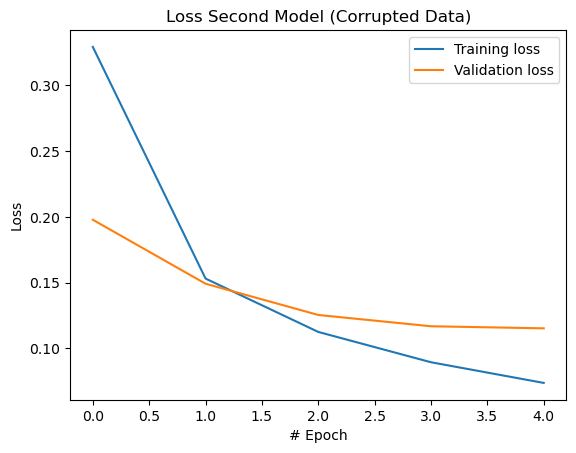

In [101]:
#See the loss function of tranning and validation of second model with corrupted data
plt.title("Loss Second Model (Corrupted Data)")
plt.xlabel('# Epoch')
plt.ylabel("Loss")
plt.plot(training_loss_corrupted1, label='Training loss')
plt.plot(validation_loss_corrupted1, label= 'Validation loss')
plt.legend()

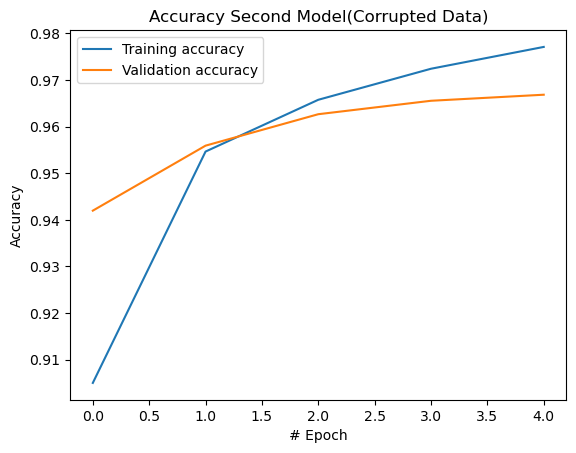

In [102]:
#See the accuracy function of tranning and validation of second model 
plt.title("Accuracy Second Model(Corrupted Data)")
plt.xlabel('# Epoch')
plt.ylabel("Accuracy")
plt.plot(training_accuracy_corrupted1, label='Training accuracy')
plt.plot(validation_accuracy_corrupted1, label='Validation accuracy')
plt.legend()

In [103]:
#Weights second model with corrupted data
weights_corrupted1

[<tf.Variable 'dense_327/kernel:0' shape=(784, 50) dtype=float32, numpy=
 array([[ 0.04260349,  0.00611305, -0.07398668, ...,  0.06410628,
         -0.04794456,  0.06040115],
        [-0.03323936, -0.08116149, -0.02777727, ...,  0.05956674,
         -0.06572842,  0.00336422],
        [-0.08266331,  0.04254726,  0.01336468, ..., -0.04715374,
         -0.06408418,  0.06181227],
        ...,
        [-0.03671965, -0.0261455 , -0.03015184, ..., -0.02452118,
          0.01583505,  0.04198051],
        [ 0.07365235,  0.00357415,  0.04171822, ...,  0.05662023,
          0.04230321, -0.07698484],
        [ 0.05600315,  0.05910636,  0.03059034, ...,  0.05636794,
          0.0577612 ,  0.02349281]], dtype=float32)>,
 <tf.Variable 'dense_327/bias:0' shape=(50,) dtype=float32, numpy=
 array([ 0.00291674, -0.06089577,  0.04526133,  0.08909667, -0.0095162 ,
        -0.06274693,  0.19468994,  0.00912296, -0.03326053, -0.09967883,
        -0.06092899,  0.05591383,  0.05826146,  0.08324838, -0.03082818

In [257]:
model_example.fit(X,Y,batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 41s 22ms/step - loss: 12.3805 - accuracy: 0.1022
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 12.3805 - accuracy: 0.1022
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 12.3805 - accuracy: 0.1022
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 12.3805 - accuracy: 0.1022
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 12.3805 - accuracy: 0.1022


In [335]:
model_example1.fit(X,Y, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1385 - accuracy: 0.9598
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1318 - accuracy: 0.9612
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1250 - accuracy: 0.9630
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1196 - accuracy: 0.9645
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1143 - accuracy: 0.9662


In [259]:
model_example_corrupted.fit(X_corrupted,Y_corrupted, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 13.6507 - accuracy: 0.0974
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 13.6507 - accuracy: 0.0974
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 13.6507 - accuracy: 0.0974
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 13.6507 - accuracy: 0.0974
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 13.6507 - accuracy: 0.0974


In [260]:
model_example_corrupted1.fit(X_corrupted,Y_corrupted, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7959 - accuracy: 0.4736
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7373 - accuracy: 0.7799
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4581 - accuracy: 0.8607
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3312 - accuracy: 0.8997


1875/1875 [==============================] - 3s 2ms/step


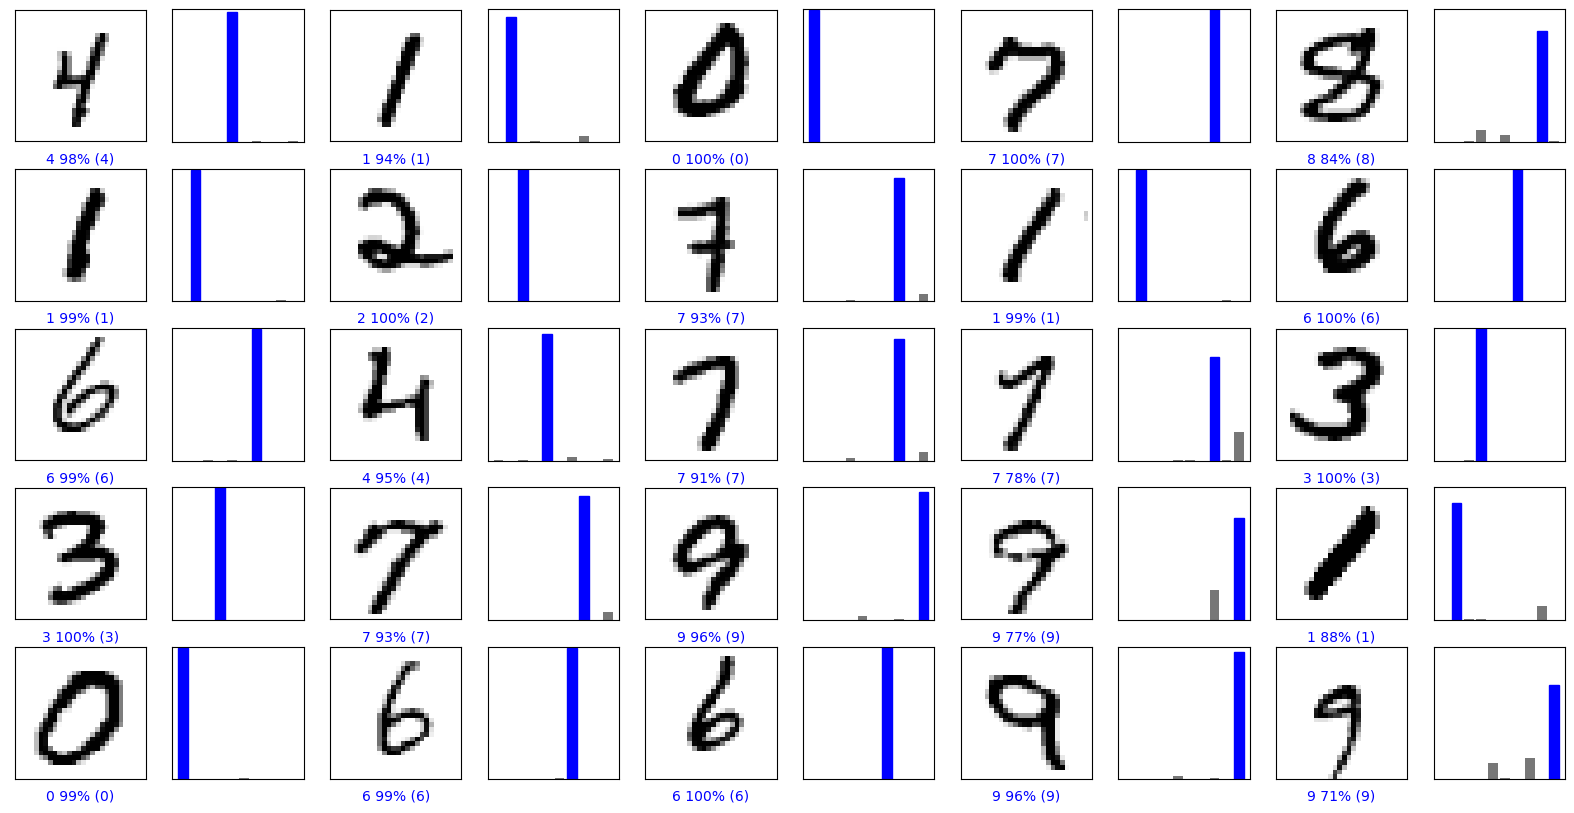

In [256]:
#Paints one grid with predictions and mark blue if correct or red if incorrect
import numpy as np

predictions = model_example.predict(test_images)

def graph_image(i, arr_predictions, real_labels, images):
  arr_predictions, real_labels, img = arr_predictions[i], real_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  label_predcition = np.argmax(arr_predictions)
  if label_predcition == real_labels:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(names_number[label_predcition], 
                                       100*np.max(arr_predictions),
                                       names_number[real_labels]),
                                       color=color)

def graph_val_arr(i, arr_predictions, real_labels):
  arr_predictions, real_labels = arr_predictions[i], real_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  graph = plt.bar(range(10), arr_predictions, color="#777777")
  plt.ylim([0, 1])
  real_labels = np.argmax(arr_predictions)

  graph[real_labels].set_color('red')
  graph[real_labels].set_color('blue')

rows = 5
columns = 5
num_images = rows*columns 
plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(num_images):
  plt.subplot(rows, 2*columns, 2*i+1)
  graph_image(i, predictions, test_labels, test_images)
  plt.subplot(rows, 2*columns, 2*i+2)
  graph_val_arr(i, predictions, test_labels)

1875/1875 [==============================] - 10s 5ms/step


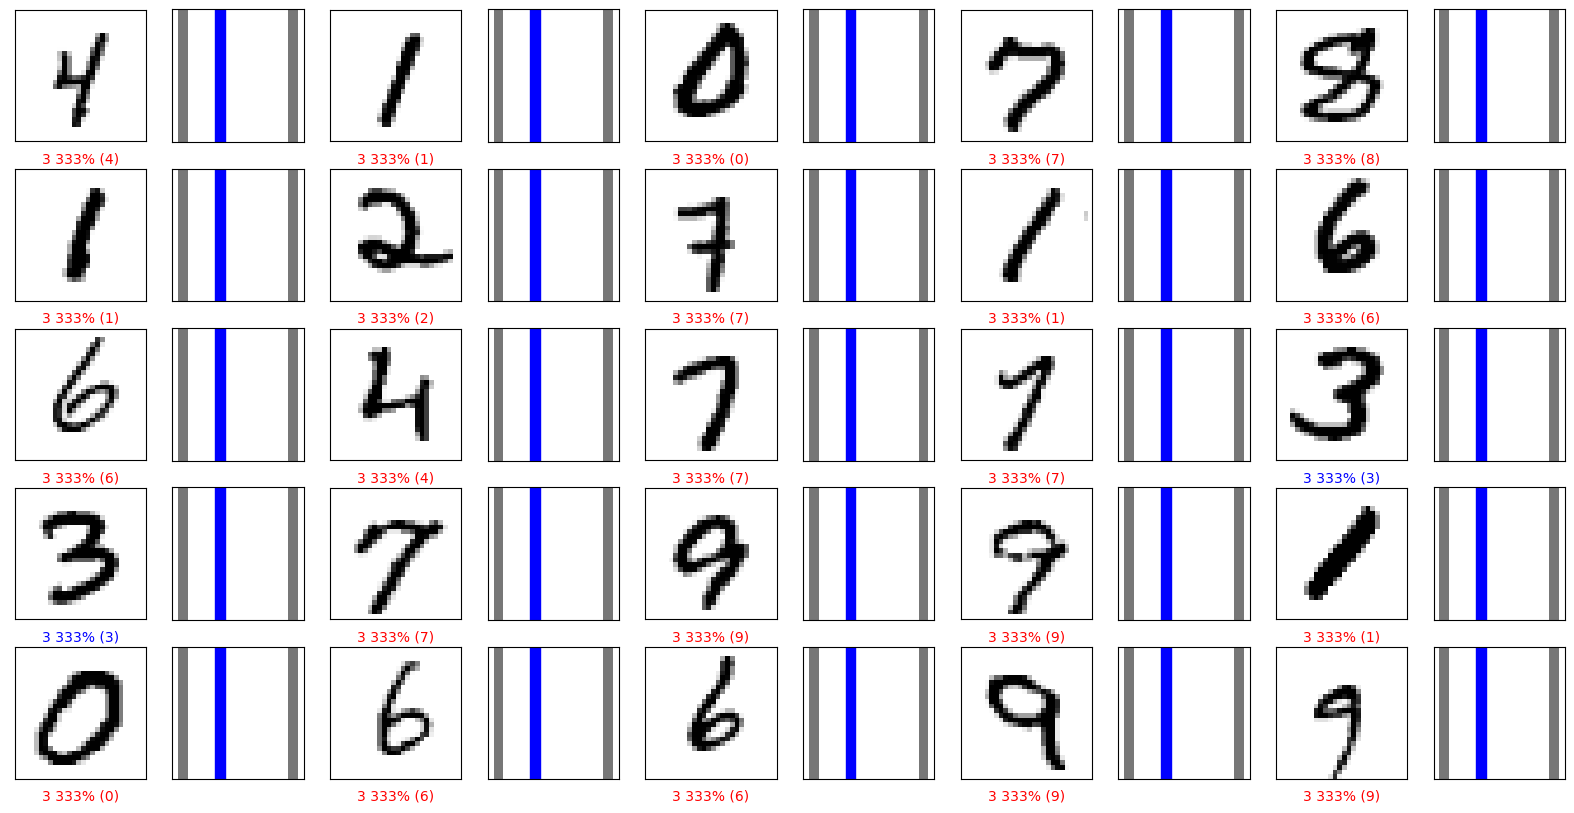

In [262]:
predictions1 = model_example.predict(test_images)

plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(num_images):
  plt.subplot(rows, 2*columns, 2*i+1)
  graph_image(i, predictions1, test_labels, test_images)
  plt.subplot(rows, 2*columns, 2*i+2)
  graph_val_arr(i, predictions1, test_labels)

1875/1875 [==============================] - 10s 6ms/step


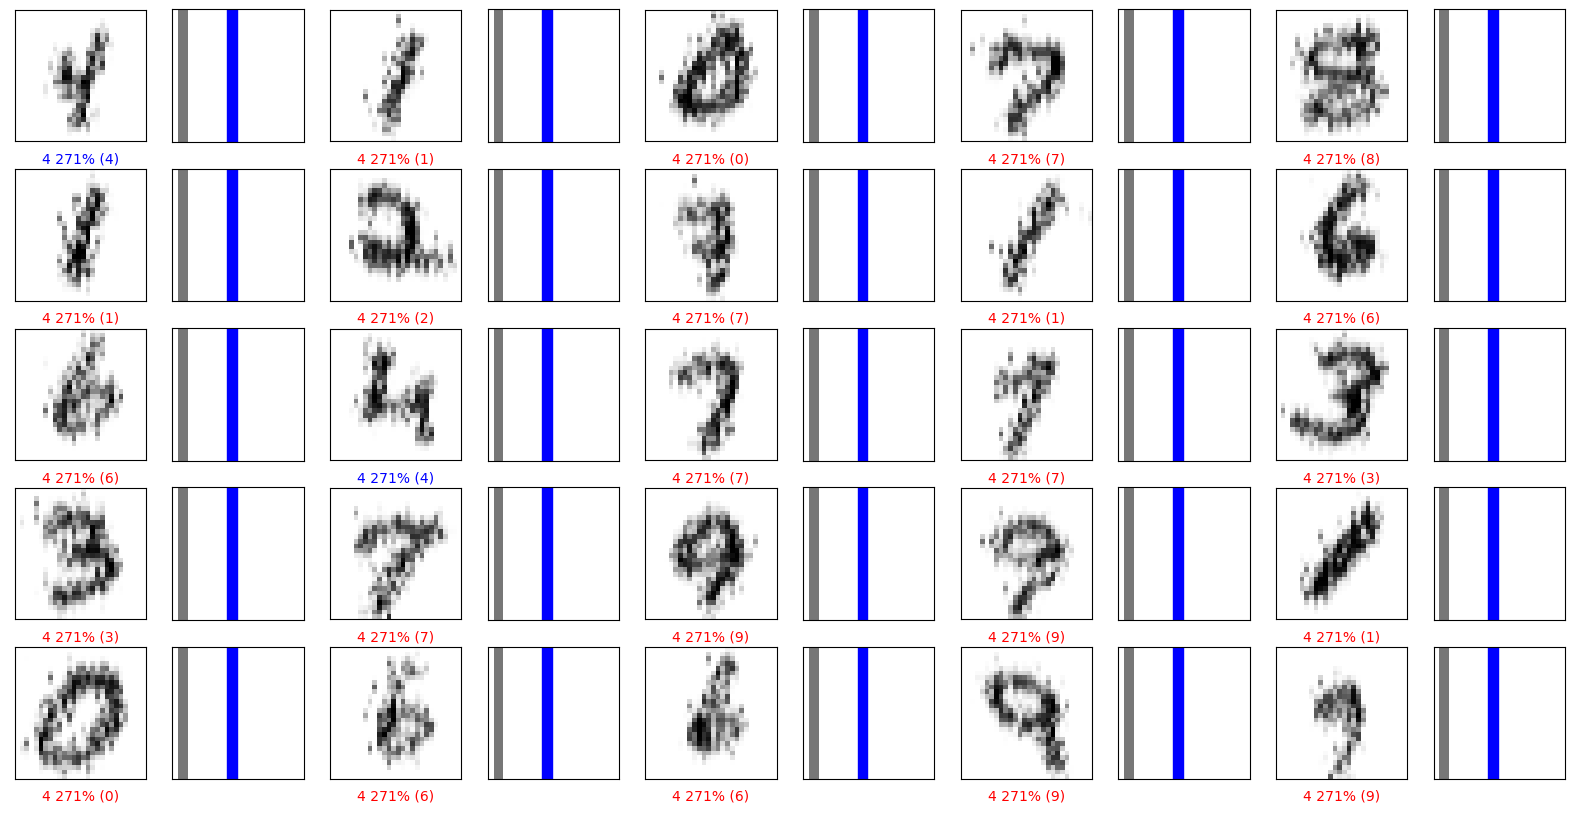

In [266]:
predictions_corrupted = model_example_corrupted.predict(test_images_corrupted)

plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(num_images):
  plt.subplot(rows, 2*columns, 2*i+1)
  graph_image(i, predictions_corrupted, test_labels, test_images_corrupted)
  plt.subplot(rows, 2*columns, 2*i+2)
  graph_val_arr(i, predictions_corrupted, test_labels)

In [1]:
predictions_corrupted1 = model_example_corrupted1.predict(test_images_corrupted)

plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(num_images):
  plt.subplot(rows, 2*columns, 2*i+1)
  graph_image(i, predictions_corrupted1, test_labels, test_images_corrupted)
  plt.subplot(rows, 2*columns, 2*i+2)
  graph_val_arr(i, predictions_corrupted1, test_labels)

NameError: name 'model_example_corrupted1' is not defined

1/1 [==============================] - 0s 18ms/step


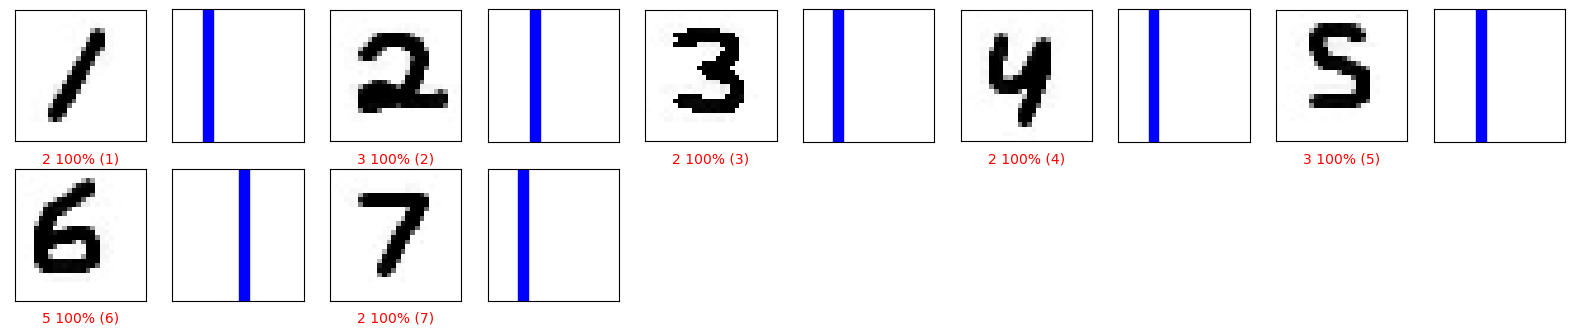

In [433]:
#Testing with our numbers 
my_testing_images = np.array(['data/one.jpeg', 'data/two.jpeg', 'data/three.jpeg', 'data/four.jpeg', 'data/five.jpeg', 'data/six.jpeg', 'data/seven.jpeg'])
my_labels = np.array([1,2,3,4,5,6,7])

def my_normalize(image):
    im = tf.image.decode_jpeg(tf.io.read_file(image), channels=3)
    im = tf.cast(im, tf.float32)
    im /=255
    return im

my_testing_images = np.array(list(map(lambda x:my_normalize(x), my_testing_images)))

p = model_example1.predict(my_testing_images)

plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(7):
  plt.subplot(rows, 2*columns, 2*i+1)
  graph_image(i, p, my_labels, my_testing_images)
  plt.subplot(rows, 2*columns, 2*i+2)
  graph_val_arr(i, p, my_labels)